In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

In [2]:
df = pd.read_csv("D:\data science\Social_Network_Ads.csv")

In [3]:
Gender={'Male':0,'Female':1}
df.Gender=[Gender[i] for i in df.Gender] 

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [6]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
df.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,0.510000,37.655000,69742.500000,0.357500
std,7.165832e+04,0.500526,10.482877,34096.960282,0.479864
min,1.556669e+07,0.000000,18.000000,15000.000000,0.000000
25%,1.562676e+07,0.000000,29.750000,43000.000000,0.000000
50%,1.569434e+07,1.000000,37.000000,70000.000000,0.000000
75%,1.575036e+07,1.000000,46.000000,88000.000000,1.000000
max,1.581524e+07,1.000000,60.000000,150000.000000,1.000000


In [8]:
data =df.drop('User ID',axis=1)

In [9]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


<AxesSubplot:xlabel='Purchased', ylabel='count'>

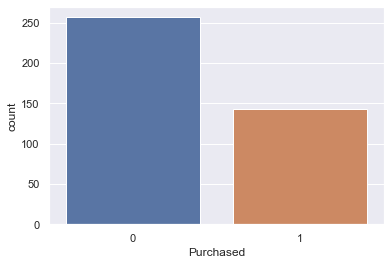

In [10]:
sns.countplot(x='Purchased', data = data)

<AxesSubplot:xlabel='Age', ylabel='count'>

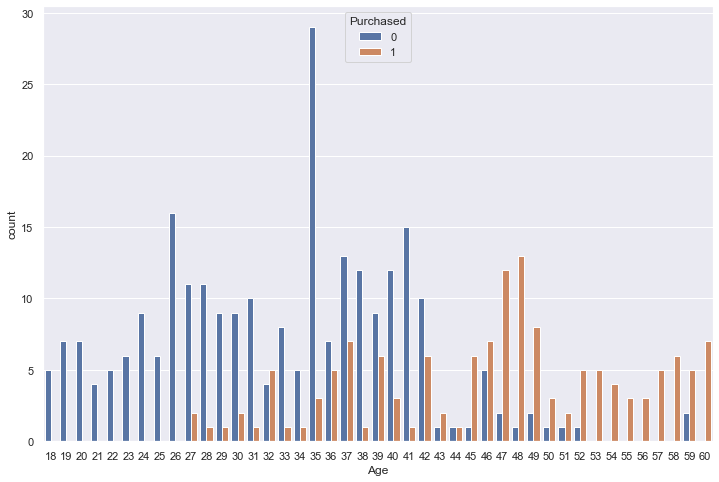

In [11]:
plt.figure(figsize=(12,8))
sns.countplot(x='Age',hue='Purchased',data=data)

C:\Users\rohit kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

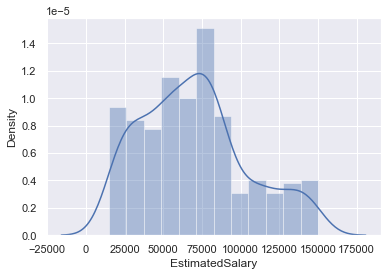

In [12]:
sns.distplot(df.EstimatedSalary)

In [13]:
x=data.drop('Purchased',axis=1)

In [13]:
y=data['Purchased']

In [49]:
col = ['Gender','Age','EstimatedSalart','Purchased']
sns.boxplot(data=df, x='col')


ValueError: Could not interpret input 'col'

# navie bayes

In [14]:
x=data.drop('Purchased',axis=1)
y=data['Purchased']

In [15]:



from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [16]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(x_train, y_train)  

GaussianNB()

In [17]:
y_pred = classifier.predict(x_test)

In [18]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [19]:
y_test


248    0
318    1
173    0
285    1
184    0
      ..
358    1
166    0
198    0
267    0
69     0
Name: Purchased, Length: 80, dtype: int64

In [20]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.84      0.94      0.88        49
           1       0.88      0.71      0.79        31

    accuracy                           0.85        80
   macro avg       0.86      0.82      0.84        80
weighted avg       0.85      0.85      0.85        80

[[46  3]
 [ 9 22]]
0.85


In [21]:
##linear regression

In [22]:
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [23]:
print(ml.intercept_)

-0.886517899338049


In [24]:
pred= ml.predict(x_test)

In [25]:
from sklearn import metrics
print('mean absolute error',metrics.mean_absolute_error(pred,y_test))
print('mean squared error',metrics.mean_squared_error(pred,y_test))
print('root mean sqared error',np.sqrt(metrics.mean_squared_error(pred,y_test)))

mean absolute error 0.29762596692472815
mean squared error 0.130687661515059
root mean sqared error 0.36150748472895966


In [26]:
##decision tree


In [27]:
from sklearn.tree import  DecisionTreeClassifier
lr = DecisionTreeClassifier()
lr.fit(x_train, y_train)

DecisionTreeClassifier()

In [28]:
y = lr.predict(x_test)

In [29]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(y_test, y))
print(confusion_matrix(y_test, y))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87        49
           1       0.82      0.74      0.78        31

    accuracy                           0.84        80
   macro avg       0.83      0.82      0.83        80
weighted avg       0.84      0.84      0.84        80

[[44  5]
 [ 8 23]]


In [30]:
##random forest

In [31]:
from sklearn.ensemble import RandomForestClassifier 
regressor = RandomForestClassifier(n_estimators =50,random_state=20)
regressor.fit(x_train, y_train)
pr = regressor.predict(x_test)

In [32]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(y_test, pr))
print(confusion_matrix(y_test, pr))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        49
           1       0.86      0.81      0.83        31

    accuracy                           0.88        80
   macro avg       0.87      0.86      0.87        80
weighted avg       0.87      0.88      0.87        80

[[45  4]
 [ 6 25]]


In [33]:
##support vector 

In [34]:
from sklearn.svm import SVC  
classifier = SVC(kernel='poly', random_state=60)  
classifier.fit(x_train, y_train)  

SVC(kernel='poly', random_state=60)

In [35]:
predict = classifier.predict(x_test)  

In [36]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(y_test, predict))
print(confusion_matrix(y_test, predict))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82        49
           1       1.00      0.29      0.45        31

    accuracy                           0.73        80
   macro avg       0.85      0.65      0.63        80
weighted avg       0.81      0.72      0.67        80

[[49  0]
 [22  9]]


In [37]:
## k nearest neighbour

In [38]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier( n_neighbors=40,p=5)
kn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=40, p=5)

In [39]:
p = kn.predict(x_test)

In [40]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(y_test, p))
print(confusion_matrix(y_test, p))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        49
           1       1.00      0.35      0.52        31

    accuracy                           0.75        80
   macro avg       0.86      0.68      0.68        80
weighted avg       0.82      0.75      0.71        80

[[49  0]
 [20 11]]
